In [8]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
try:
    import pcmdpy_gpu as ppy
except:
    import pcmdpy as ppy
from tqdm import tqdm
plt.style.use('seaborn-poster')
%matplotlib inline

In [9]:
filters = ppy.instrument.default_m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(filters, mag_system='ab')
driv = ppy.driver.Driver(iso_model, gpu=ppy.gpu_utils._GPU_ACTIVE)

In [10]:
gal = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(), 
    ppy.dustmodels.SingleDust(dust_frac=0.5),
    ppy.sfhmodels.TauModel(),
    ppy.distancemodels.VariableDistance(),
)

In [11]:
p = {}
p[0] = np.array([-0.5, -0.5, 3.0, 3.0, 25.0])
p[1] = p[0] + np.array([0.5, 0., 0., 0., 0.])
p[2] = p[0] + np.array([-0.5, 0., 0., 0., 0.])
p[3] = p[0] + np.array([0., 0.5, 0., 0., 0.])
p[4] = p[0] + np.array([0., -0.5, 0., 0., 0.])
p[5] = p[0] + np.array([0., 0., 0., 9.0, 0.])
p[6] = p[0] + np.array([0., 0., 0., -2.0, 0.])
p[7] = p[0] + np.array([0., 0., 0.5, 0., 0.])
p[8] = p[0] + np.array([0., 0., -0.5, 0., 0.])
p[9] = p[0] + np.array([0., 0., 0., 0., -1.25])
p[10] = p[0] + np.array([0., 0., 0., 0., +1.25])

In [12]:
if ppy.gpu_utils._GPU_ACTIVE:
    Nim = 1024
else:
    Nim = 128
pcmds = {}
for i in tqdm(range(0, 11)):
    gal.set_params(p[i])
    pcmds[i] = driv.simulate(gal, Nim, shot_noise=False)[0]

100%|██████████| 11/11 [00:38<00:00,  3.45s/it]


In [13]:
titles = {}
titles[0] = 'Baseline Model'
titles[1] = '[Fe/H] + 0.5'
titles[2] = '[Fe/H] - 0.5'
titles[3] = '$\log$ E(B-V) + 0.5'
titles[4] = '$\log$ E(B-V) - 0.5'
titles[5] = r'$\tau$ x 3'
titles[6] = r'$\tau$ x 1/3'
titles[7] = r'$\log \mathrm{N_{pix}}$ + 0.5'
titles[8] = r'$\log \mathrm{N_{pix}}$ - 0.5'
titles[9] = r'$\mu$ - 1.25'
titles[10] = r'$\mu$ + 1.25'

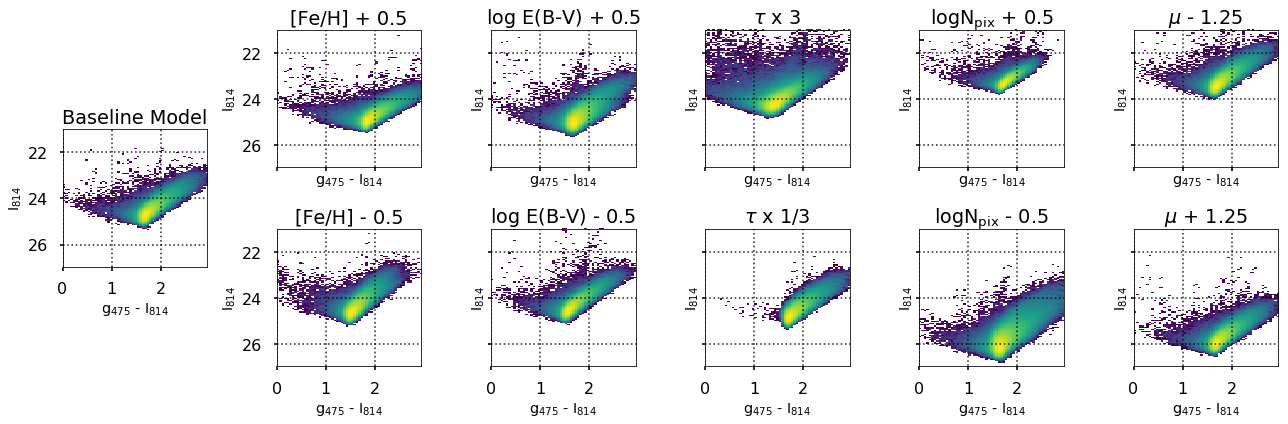

In [50]:
f = plt.figure(figsize=(18, 6))
gs = mpl.gridspec.GridSpec(200, 6)
axes = []
axes.append(f.add_subplot(gs[50:150, 0]))
axes.append(f.add_subplot(gs[:100, 1], sharex=axes[0], sharey=axes[0]))
axes.append(f.add_subplot(gs[100:, 1], sharex=axes[0], sharey=axes[0]))
axes.append(f.add_subplot(gs[:100, 2], sharex=axes[0], sharey=axes[0]))
axes.append(f.add_subplot(gs[100:, 2], sharex=axes[0], sharey=axes[0]))
axes.append(f.add_subplot(gs[:100, 3], sharex=axes[0], sharey=axes[0]))
axes.append(f.add_subplot(gs[100:, 3], sharex=axes[0], sharey=axes[0]))
axes.append(f.add_subplot(gs[:100, 4], sharex=axes[0], sharey=axes[0]))
axes.append(f.add_subplot(gs[100:, 4], sharex=axes[0], sharey=axes[0]))
axes.append(f.add_subplot(gs[:100, 5], sharex=axes[0], sharey=axes[0]))
axes.append(f.add_subplot(gs[100:, 5], sharex=axes[0], sharey=axes[0]))

bins = [np.arange(21, 27, 0.05), np.arange(0, 3, 0.05)]

for i, a in enumerate(axes):
    ppy.plotting.plot_pcmd(pcmds[i], ax=a, bins=bins)
    ppy.plotting.plot_isochrone(iso_model, dmod=25.0, axes=a, zorder=-1, alpha=0.)
    a.set_aspect('auto')
    if i > 2:
        plt.setp(a.get_yticklabels(), visible=False)
    if (i % 2):
        plt.setp(a.get_xticklabels(), visible=False)
    a.set_title(titles[i])
    a.grid(True, linestyle=':', color='k', alpha=0.8)

plt.tight_layout()
if ppy.gpu_utils._GPU_ACTIVE:
    plt.savefig('figures/paper1/param_variance.pdf')

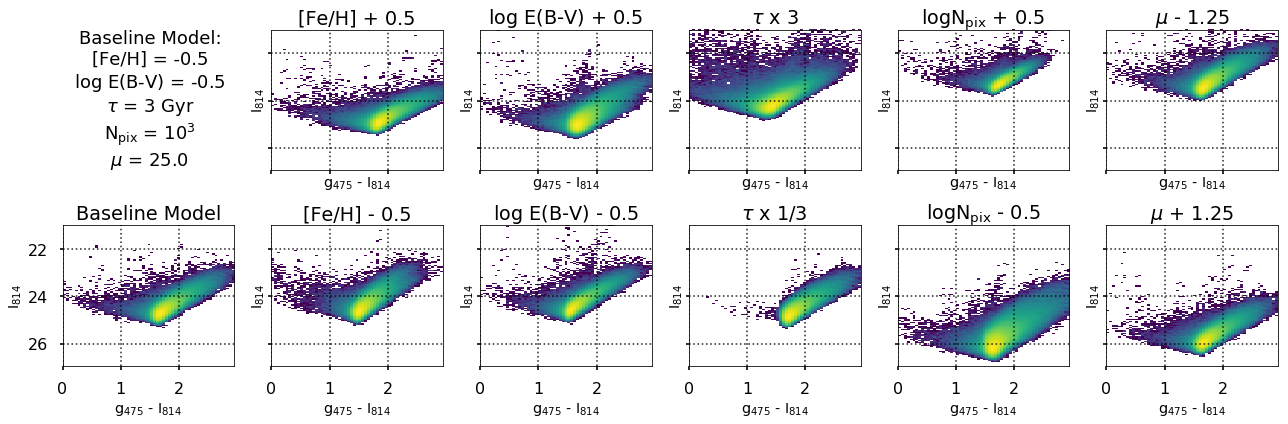

In [51]:
f, axes = plt.subplots(figsize=(18, 6), ncols=6, nrows=2, sharex=True, sharey=True)
axes = axes.T.flatten()
bins = [np.arange(21, 27, 0.05), np.arange(0, 3, 0.05)]

model_text = r"""Baseline Model:
[Fe/H] = -0.5
$\log$ E(B-V) = -0.5
$\tau$ = 3 Gyr
$\mathrm{N_{pix}}$ = 10$^3$
$\mu$ = 25.0
"""

axes[0].axis('off')
axes[0].text(1.5, 21, model_text, verticalalignment='top', horizontalalignment='center',
            fontsize=18)

for i, a in enumerate(axes[1:]):
    ppy.plotting.plot_pcmd(pcmds[i], ax=a, bins=bins)
    ppy.plotting.plot_isochrone(iso_model, dmod=25.0, axes=a, zorder=-1, alpha=0.)
    a.set_aspect('auto')
    if i > 2:
        plt.setp(a.get_yticklabels(), visible=False)
    if (i % 2):
        plt.setp(a.get_xticklabels(), visible=False)
    a.set_title(titles[i])
    a.grid(True, linestyle=':', color='k', alpha=0.8)

plt.tight_layout()
if ppy.gpu_utils._GPU_ACTIVE:
    plt.savefig('figures/paper1/param_variance_text.pdf')

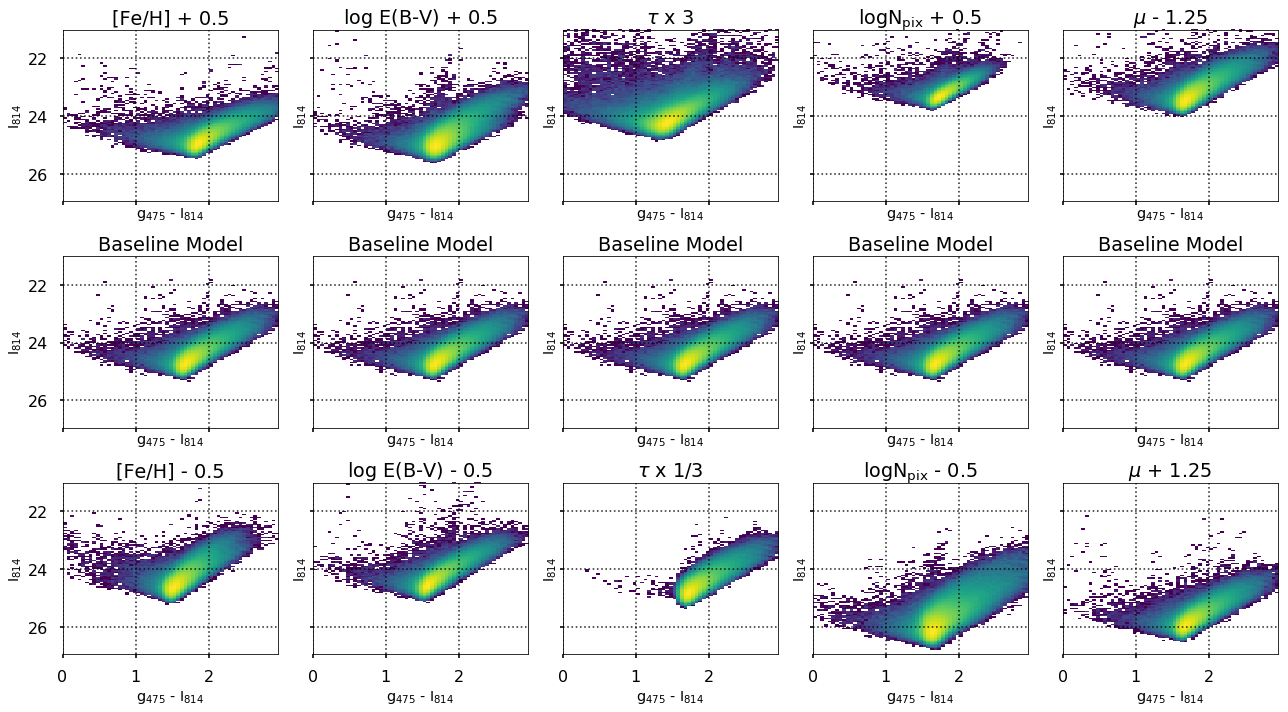

In [52]:
f, axes = plt.subplots(figsize=(18, 10), ncols=5, nrows=3, sharex=True, sharey=True)

bins = [np.arange(21, 27, 0.05), np.arange(0, 3, 0.05)]

for i, a in enumerate(axes[0]):
    j = 1+2*i
    ppy.plotting.plot_pcmd(pcmds[j], ax=a, bins=bins)
    a.set_aspect('auto')
    a.set_title(titles[j])
    
for i, a in enumerate(axes[2]):
    j = 2+2*i
    ppy.plotting.plot_pcmd(pcmds[j], ax=a, bins=bins)
    a.set_aspect('auto')
    a.set_title(titles[j])    

for i, a in enumerate(axes[1]):
    ppy.plotting.plot_pcmd(pcmds[0], ax=a, bins=bins)
    a.set_aspect('auto')
    a.set_title(titles[0])    
    
for i, a in enumerate(axes.flatten()):
    ppy.plotting.plot_isochrone(iso_model, dmod=25.0, axes=a, zorder=-1, alpha=0.)
    a.grid(True, linestyle=':', color='k', alpha=0.8)

plt.tight_layout()
if ppy.gpu_utils._GPU_ACTIVE:
    plt.savefig('figures/paper1/param_variance_3row.pdf')